In [1]:
%cd '../../../../mts/SMAP_MSL/data'

/mts/SMAP_MSL/data


In [2]:
%pwd

'/mts/SMAP_MSL/data'

In [3]:
train_folder = '../../../../mts/SMAP_MSL/data/train/'
test_folder = '../../../../mts/SMAP_MSL/data/test/'

In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
labeled_anomalies = pd.read_csv('../../../../mts/SMAP_MSL/data/labeled_anomalies.csv')

In [6]:
labeled_anomalies.head()

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307


In [6]:
random_file = np.load(test_folder + 'A-1.npy')

In [5]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(train, test):
    scaler = MinMaxScaler(feature_range=(0, 1), clip=True).fit(train)

    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)

    return train_scaled, test_scaled

/root/.conda/envs/py3.9test/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [39]:
smap = labeled_anomalies[labeled_anomalies['spacecraft'] == 'SMAP']
smap.head()

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307


In [40]:
smap[smap['chan_id'] == 'T-1']

,chan_id,spacecraft,anomaly_sequences,class,num_values
33,T-1,SMAP,"[[2399, 3898], [6550, 6585]]","[point, contextual]",8612


In [7]:
msl = labeled_anomalies[labeled_anomalies['spacecraft'] == 'MSL']
msl.head()

,chan_id,spacecraft,anomaly_sequences,class,num_values
55,M-6,MSL,"[[1850, 2030]]",[point],2049
56,M-1,MSL,"[[1110, 2250]]",[contextual],2277
57,M-2,MSL,"[[1110, 2250]]",[contextual],2277
58,S-2,MSL,"[[900, 910]]",[point],1827
59,P-10,MSL,"[[4590, 4720]]",[point],6100


In [41]:
msl[msl['chan_id'] == 'T-1']

NameError: name 'msl' is not defined

In [12]:
# smap_files = smap['chan_id'].values
msl_files = msl['chan_id'].values
# print(len(smap_files))
print(len(msl_files))
# print(smap_files)
print(sorted(msl_files))

27
['C-1', 'C-2', 'D-14', 'D-15', 'D-16', 'F-4', 'F-5', 'F-7', 'F-8', 'M-1', 'M-2', 'M-3', 'M-4', 'M-5', 'M-6', 'M-7', 'P-10', 'P-11', 'P-14', 'P-15', 'S-2', 'T-12', 'T-13', 'T-4', 'T-5', 'T-8', 'T-9']


In [17]:
for file in smap_files:
    # load
    train_original = np.load(train_folder + f'{file}.npy')
    test_original = np.load(test_folder + f'{file}.npy')
    print(f'Original range for {file}: [{train_original.min()}  {train_original.max()}], [{train_original.min()} {train_original.max()}]')
    # scale
    train_scaled, test_scaled = scale_data(train_original, test_original)
    print(f'Scaled range for {file}: [{train_scaled.min()}  {train_scaled.max()}], [{test_scaled.min()} {test_scaled.max()}]')
    # build labels
    labels = np.zeros_like(test_scaled)
    indices = smap[smap['chan_id'] == file]['anomaly_sequences'].values[0]
    indices = indices.replace(']', '').replace('[', '').split(', ')
    indices = [int(i) for i in indices]
    for i in range(0, len(indices), 2):
        labels[indices[i]:indices[i+1], :] = 1
    # save
    dir = '../../TranAD/processed/SMAP'
    os.makedirs(dir, exist_ok=True)
    np.save(f'{dir}/{file}_train.npy', train_scaled)
    np.save(f'{dir}/{file}_test.npy', test_scaled)
    np.save(f'{dir}/{file}_labels.npy', labels)    


Original range for P-1: [-1.0  1.0], [-1.0 1.0]
Scaled range for P-1: [0.0  1.0], [0.0 1.0]
Original range for S-1: [-0.4  1.0], [-0.4 1.0]
Scaled range for S-1: [0.0  1.0], [0.0 1.0]
Original range for E-1: [-1.0  1.0], [-1.0 1.0]
Scaled range for E-1: [0.0  1.0], [0.0 1.0]
Original range for E-2: [-1.0  1.0], [-1.0 1.0]
Scaled range for E-2: [0.0  1.0], [0.0 1.0]
Original range for E-3: [-1.0  1.0], [-1.0 1.0]
Scaled range for E-3: [0.0  1.0], [0.0 1.0]
Original range for E-4: [-0.9999999999999998  1.0000000000000004], [-0.9999999999999998 1.0000000000000004]
Scaled range for E-4: [0.0  1.0], [0.0 1.0]
Original range for E-5: [-1.0  1.0], [-1.0 1.0]
Scaled range for E-5: [0.0  1.0], [0.0 1.0]
Original range for E-6: [0.0  1.0], [0.0 1.0]
Scaled range for E-6: [0.0  1.0], [0.0 1.0]
Original range for E-7: [-1.0  1.0], [-1.0 1.0]
Scaled range for E-7: [0.0  1.0], [0.0 1.0]
Original range for E-8: [-1.0  1.0], [-1.0 1.0]
Scaled range for E-8: [0.0  1.0], [0.0 1.0]
Original range for E-9

In [18]:
for file in msl_files:
    # load
    train_original = np.load(train_folder + f'{file}.npy')
    test_original = np.load(test_folder + f'{file}.npy')
    print(f'Original range for {file}: [{train_original.min()}  {train_original.max()}], [{train_original.min()} {train_original.max()}]')
    # scale
    train_scaled, test_scaled = scale_data(train_original, test_original)
    print(f'Scaled range for {file}: [{train_scaled.min()}  {train_scaled.max()}], [{test_scaled.min()} {test_scaled.max()}]')
    # build labels
    labels = np.zeros_like(test_scaled)
    indices = msl[msl['chan_id'] == file]['anomaly_sequences'].values[0]
    indices = indices.replace(']', '').replace('[', '').split(', ')
    indices = [int(i) for i in indices]
    for i in range(0, len(indices), 2):
        labels[indices[i]:indices[i+1], :] = 1
    # save
    dir = '../../TranAD/processed/MSL'
    os.makedirs(dir, exist_ok=True)
    np.save(f'{dir}/{file}_train.npy', train_scaled)
    np.save(f'{dir}/{file}_test.npy', test_scaled)
    np.save(f'{dir}/{file}_labels.npy', labels)    


Original range for M-6: [-1.0  1.0], [-1.0 1.0]
Scaled range for M-6: [0.0  1.0], [0.0 1.0]
Original range for M-1: [-0.9160935512741932  2.4922982712327473], [-0.9160935512741932 2.4922982712327473]
Scaled range for M-1: [0.0  1.0], [0.0 1.0]
Original range for M-2: [-1.210726170949998  1.0], [-1.210726170949998 1.0]
Scaled range for M-2: [0.0  1.0], [0.0 1.0]
Original range for S-2: [-1.0  1.0], [-1.0 1.0]
Scaled range for S-2: [0.0  1.0], [0.0 1.0]
Original range for P-10: [0.0  1.001129464915996], [0.0 1.001129464915996]
Scaled range for P-10: [0.0  1.0], [0.0 1.0]
Original range for T-4: [-1.0  1.0], [-1.0 1.0]
Scaled range for T-4: [0.0  1.0], [0.0 1.0]
Original range for T-5: [-1.0  1.0], [-1.0 1.0]
Scaled range for T-5: [0.0  1.0], [0.0 1.0]
Original range for F-7: [-0.9999999999999998  1.0], [-0.9999999999999998 1.0]
Scaled range for F-7: [0.0  1.0], [0.0 1.0]
Original range for M-3: [-1.47721668720188  1.000070758018348], [-1.47721668720188 1.000070758018348]
Scaled range for

In [45]:
t_1_test = np.load(test_folder + 'T-1.npy')
t_1_train = np.load(train_folder + 'T-1.npy')

In [46]:
t_1_train.shape

(2875, 25)

min_original_test = t_1_test.min()
max_original_test = t_1_test.max()
min_original_train = t_1_train.min()
max_original_train = t_1_train.max()

In [13]:
print(f'{min_original_train} {max_original_train}')
print(f'{min_original_test} {max_original_test}')

-1.0 1.0
-1.0 1.0


In [14]:
print(t_1_train.mean())
print(t_1_test.mean())

0.023095539152304296
0.020554483585080625


In [15]:
t_1_train_scaled, t_1_test_scaled = scale_data(t_1_train, t_1_test)

In [18]:
min_train_scaled = t_1_train_scaled.min()
max_train_scaled = t_1_train.max()
min_test_scaled = t_1_test_scaled.min()
max_test_scaled = t_1_test.max()

In [19]:
print(f'{min_train_scaled} {max_train_scaled}')
print(f'{min_test_scaled} {max_test_scaled}')

0.0 1.0
0.0 1.0


In [20]:
print(t_1_train_scaled.mean())
print(t_1_test_scaled.mean())

0.0315616826196304
0.030848537658773482


In [21]:
np.histogram(t_1_train)

(array([  191,   112,    88,    76,    64, 69065,    84,    76,   176,
         1943]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]))

<AxesSubplot:ylabel='Count'>

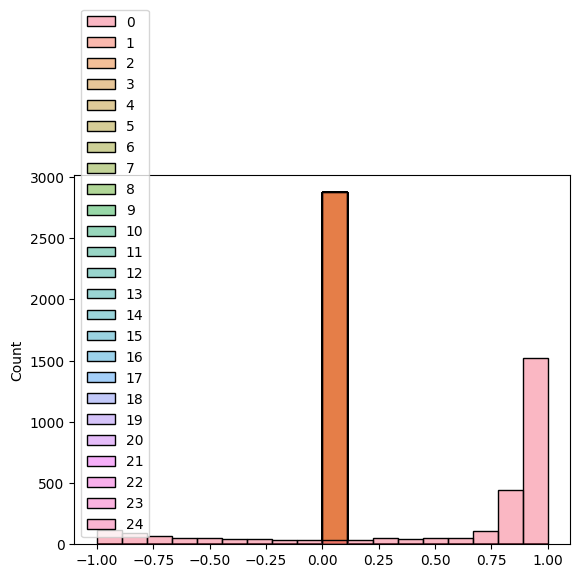

In [23]:
import seaborn as sns
sns.histplot(t_1_train)

<AxesSubplot:ylabel='Count'>

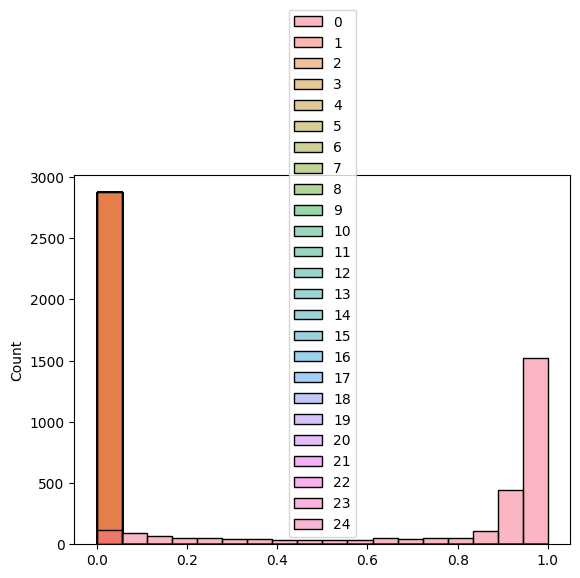

In [24]:

sns.histplot(t_1_train_scaled)

<AxesSubplot:ylabel='Count'>

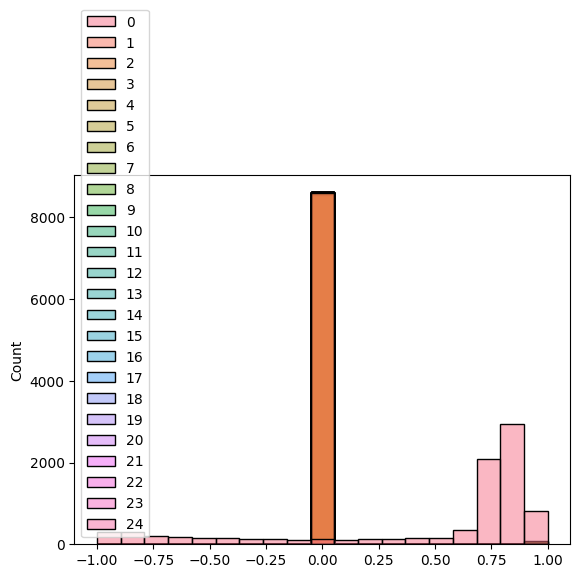

In [25]:
sns.histplot(t_1_test)

<AxesSubplot:ylabel='Count'>

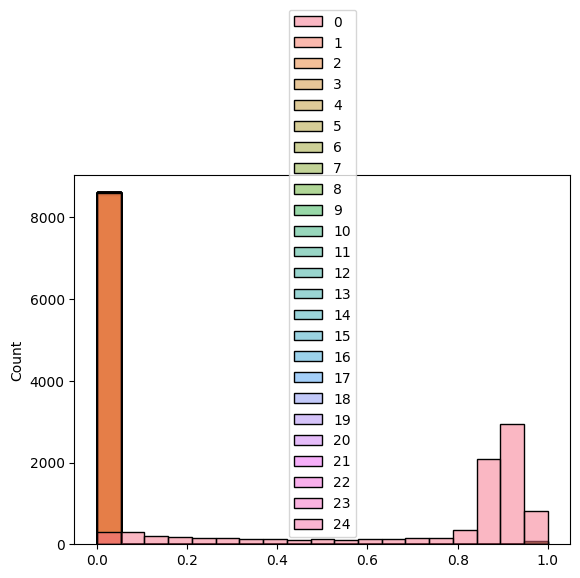

In [26]:
sns.histplot(t_1_test_scaled)

In [28]:
train_scaled_2, test_scaled_1 = scale_data2(t_1_train, t_1_test)

<AxesSubplot:ylabel='Count'>

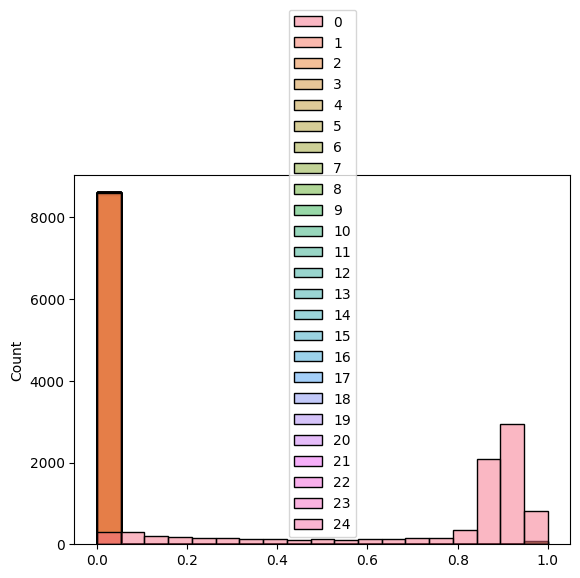

In [29]:
sns.histplot(test_scaled_1)

In [30]:
t_1_train.shape

(2875, 25)

In [31]:
t_1_train[:, 0].min()

-1.0

In [37]:
for feature in range(0, 25):
    print(f'{t_1_test[:, feature].mean()} {t_1_test_scaled[:, feature].mean()}')
    print(f'{t_1_test[:, feature].min()} {t_1_test[:, feature].max()}')
    print(f'{t_1_test_scaled[:, feature].min()} {t_1_test_scaled[:, feature].max()}')
    print('-------------')
    

0.48529729631535756 0.7426486481576787
-1.0 1.0
0.0 1.0
-------------
0.0019739897816999537 0.0019739897816999537
0.0 1.0
0.0 1.0
-------------
0.00034835113794705065 0.00034835113794705065
0.0 1.0
0.0 1.0
-------------
0.0015095215977705527 0.0015095215977705527
0.0 1.0
0.0 1.0
-------------
0.0 0.0
0.0 0.0
0.0 0.0
-------------
0.008941012540640966 0.008941012540640966
0.0 1.0
0.0 1.0
-------------
0.006967022758941012 0.006967022758941012
0.0 1.0
0.0 1.0
-------------
0.00023223409196470042 0.00023223409196470042
0.0 1.0
0.0 1.0
-------------
0.0 0.0
0.0 0.0
0.0 0.0
-------------
0.0 0.0
0.0 0.0
0.0 0.0
-------------
0.0 0.0
0.0 0.0
0.0 0.0
-------------
0.00023223409196470042 0.00023223409196470042
0.0 1.0
0.0 1.0
-------------
0.0 0.0
0.0 0.0
0.0 0.0
-------------
0.00011611704598235021 0.00011611704598235021
0.0 1.0
0.0 1.0
-------------
0.00011611704598235021 0.00011611704598235021
0.0 1.0
0.0 1.0
-------------
0.0 0.0
0.0 0.0
0.0 0.0
-------------
0.0 0.0
0.0 0.0
0.0 0.0
------